**# Limpieza de datos**

Dataset de pasientes propensos a desarrollar diabetes.
contenido: 

*   Si tiene hijos (Pregnancies	)
*   Nivel de glucosa (Glucose)
*   Presión arterial (BloodPressure)
*   Grosor de piel (SkinThickness)
*   Niveles de insulina (Insulin)
*   Índice de masa corpotal (BMI)
*   Historial familiar (DiabetesPedigreeFunction)
*   Edad (Age)

Se realizara una limpieza de datos con la finalidad de encontrar cuales son las personas entre 20 y 50 años los cuales si desarrollaron la enfermedad asi como graficas las cuales muestren la media entre las edades en los cuales los pasientes tienen problemas con el sobrepeso, altos niveles de glucosa.

El analísis se hara utilizando frameworks de python como lo son Pandas, Numpy, asi como Matlibplot para mostrar los graficos.

Dataset tomado de la base de datos [Kaggle](https://www.kaggle.com/)









In [ ]:
#importar csv

from google.colab import files 
  
  
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
#importar frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io 

#lectura del csv
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv'])) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#visualizar datos

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Limpieza de datos**

In [ ]:
#data frame 

df_filtrado = df.fillna(0)

df_filtrado.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# definir dataset con el rango de edad deseado
df_rangoEdad = df_filtrado[(df_filtrado["Age"]<50) & (df_filtrado["Age"]>18)]

df_rangoEdad.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# separar pacientes positivos y negativos a la enfermedad

df_positive = df_rangoEdad[df_rangoEdad["Outcome"]==1]

df_negative = df_rangoEdad[df_rangoEdad["Outcome"]==0]

In [ ]:
# casos positivos

df_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
11,10,168,74,0,0,38.0,0.537,34,1
15,7,100,0,0,0,30.0,0.484,32,1


In [ ]:
# casos negativos
df_negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


Ya contamos con 2 sets de datos de pacientes positivos negativos en temprana edad con los cuales de desearlo podriamos generar un entrenamiento para analizar casos nuevos y lo propensos que son a ser diabeticos.

A continuacion se realizara el analisis y graficas para conocer los puntos criticos respecto al nivel de glucosa, indice de masa corporal y si cuentan con parientes directos con esta enfermedad.

In [ ]:
# agrupación por edad y la media de la glucosa, imc y si cuentan con parientes directos enfermos
gruposEdad = df_positive.groupby("Age").agg({
       "Glucose":"mean",
       "BMI":"mean",
       "DiabetesPedigreeFunction":"mean"
})

gruposEdad.head()

,Glucose,BMI,DiabetesPedigreeFunction
Age,,,
21,139.400000,37.560000,0.642600
22,153.818182,35.045455,0.658273
23,122.857143,35.085714,0.469571
24,140.500000,38.775000,0.411750
25,145.785714,38.328571,0.885143


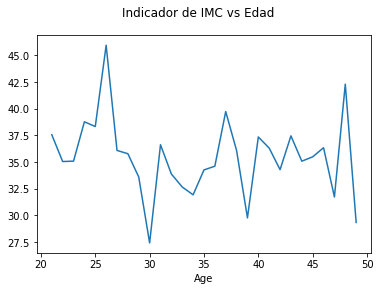

In [ ]:
fig, axs = plt.subplots(1)
fig.suptitle('Indicador de IMC vs Edad')
gruposEdad["BMI"].plot()

plt.show()

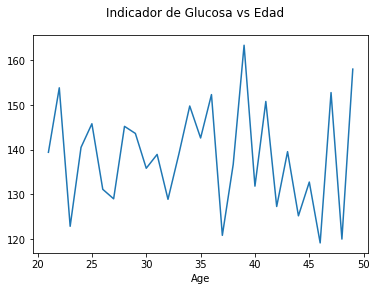

In [ ]:
fig, axs = plt.subplots(1)
fig.suptitle('Indicador de Glucosa vs Edad')
gruposEdad["Glucose"].plot()

plt.show()

In [ ]:
# descargar y convertir los dataframes a csv 

df_positive.to_cvs("DiabetesCasosPositivos.csv")
df_negative.to_cvs("DiabetesCasosPositivos.csv")